# <h1 style="text-align:center;">Lab IA - 23MDS010 </h1>

## Load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\raval\Downloads\TSA_IA2.xlsx")

In [3]:
df

,data
0,115.36539
1,114.63150
2,114.63150
3,116.09940
4,116.34400
...,...
554,112.67420
555,112.18491
556,112.91890
557,112.42960


## Run Sequence Plot

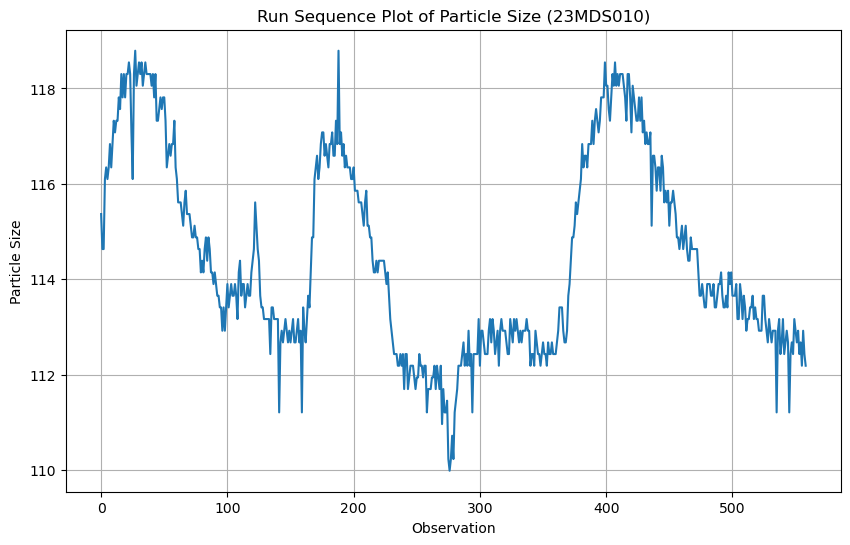

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df.data, linestyle='-')
plt.title('Run Sequence Plot of Particle Size (23MDS010)')
plt.xlabel('Observation')
plt.ylabel('Particle Size')
plt.grid(True)
plt.show()

We can make the following conclusions from the run sequence plot:
1. The data show strong and positive autocorrelation.
2. There does not seem to be a significant trend or any obvious seasonal pattern in the data.

Autocorrelation Plot

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

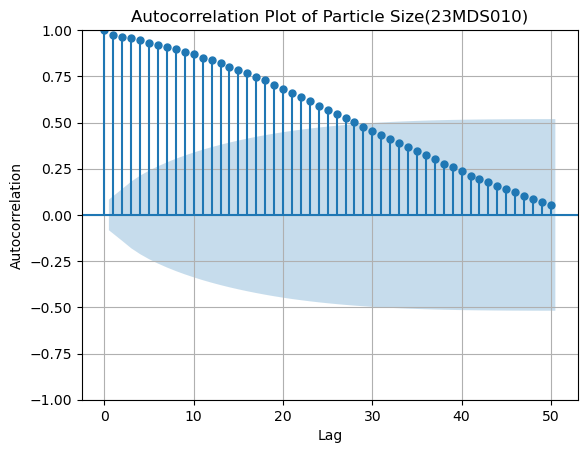

In [6]:
plt.figure(figsize=(10, 6))
plot_acf(df.data, lags=50)
plt.title('Autocorrelation Plot of Particle Size(23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

The autocorrelation plot shows that the sample autocorrelations are very strong and positive and decay very slowly.
The autocorrelation plot indicates that the process is non-stationary.

## The run sequence plot of the differenced data

In [7]:
import numpy as np

In [8]:
differenced_data = np.diff(df.data)

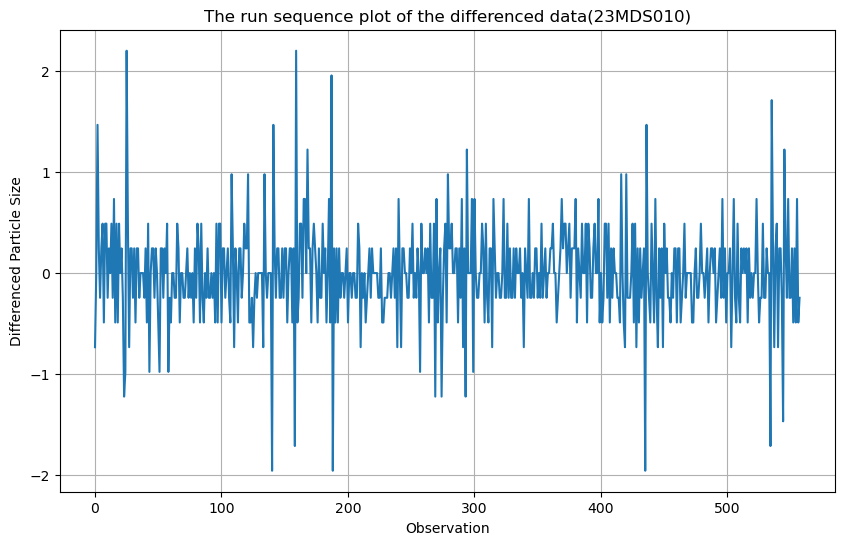

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(differenced_data, linestyle='-')
plt.title('The run sequence plot of the differenced data(23MDS010)')
plt.xlabel('Observation')
plt.ylabel('Differenced Particle Size')
plt.grid(True)
plt.show()

The run sequence plot of the differenced data shows that the mean of the differenced data is around zero, with the differenced data less autocorrelated than the original data.

## The autocorrelation plot of the differenced data with a 95% confidence

<Figure size 1000x600 with 0 Axes>

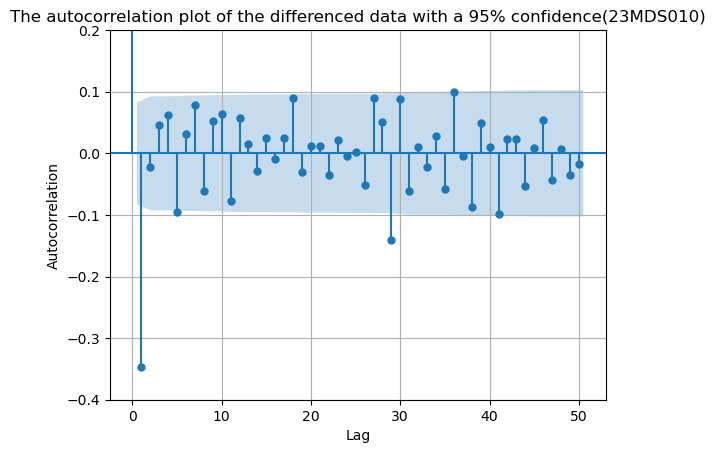

In [10]:
plt.figure(figsize=(10, 6))
plot_acf(differenced_data, lags=50)
plt.title('The autocorrelation plot of the differenced data with a 95% confidence(23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)  # Set the y-axis limits
plt.show()

The autocorrelation plot of the differenced data with a 95% confidence band shows that only the autocorrelation at lag 1 is significant. The autocorrelation plot together with run sequence of the differenced data suggest that the differenced data are stationary. Based on the autocorrelation plot, an MA(1) model is suggested for the differenced data.

## The partial autocorrelation plot of the differenced data with 95% confidence

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

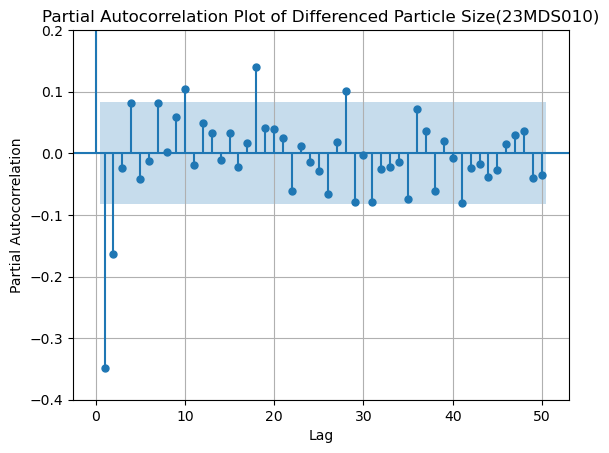

In [12]:
plt.figure(figsize=(10, 6))
plot_pacf(differenced_data, lags=50)
plt.title('Partial Autocorrelation Plot of Differenced Particle Size(23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)  # Set the y-axis limits
plt.show()

The partial autocorrelation plot of the differenced data with 95% confidence bands shows that only the partial autocorrelations of the first and second lag are significant. This suggests an AR(2) model for the differenced data.

based on above graphs we try ARIMA(2,1,0) and ARIMA(0,1,1) 

## Auto Regression

In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.ar_model import AutoReg
from tabulate import tabulate

In [31]:
df1 = pd.DataFrame({'data': differenced_data})

In [32]:
model = AutoReg(df1['data'], lags=2).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   data   No. Observations:                  558
Model:                     AutoReg(2)   Log Likelihood                -334.934
Method:               Conditional MLE   S.D. of innovations              0.442
Date:                Thu, 25 Apr 2024   AIC                            677.868
Time:                        10:43:22   BIC                            695.152
Sample:                             2   HQIC                           684.619
                                  558                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.019     -0.359      0.719      -0.043       0.030
data.L1       -0.4068      0.042     -9.721      0.000      -0.489      -0.325
data.L2       -0.1647      0.042     -3.941      0.0

In [33]:
intercept = model.params[0]
ar1 = model.params[1]
ar2 = model.params[2]
se_intercept = model.bse[0]
se_ar1 = model.bse[1]
se_ar2 = model.bse[2]
ci_ar1 = model.conf_int().iloc[1]
ci_ar2 = model.conf_int().iloc[2]

In [34]:
output_data = [
    ["Intercept", f"{intercept:.4f}", f"{se_intercept:.4f}", ""],
    ["AR1", f"{ar1:.4f}", f"{se_ar1:.4f}", f"({ci_ar1[0]:.4f}, {ci_ar1[1]:.4f})"],
    ["AR2", f"{ar2:.4f}", f"{se_ar2:.4f}", f"({ci_ar2[0]:.4f}, {ci_ar2[1]:.4f})"],
    ["Number of Observations:", len(df1['data']), "", ""],
    ["Degrees of Freedom:", len(df1['data']) - 3, "", ""],
    ["Residual Standard Deviation:", model.scale, "", ""]
]

table_headers = ["Source", "Estimate", "Standard Error", "95% Confidence Interval"]
print(tabulate(output_data, headers=table_headers, tablefmt="pipe"))

| Source                       |   Estimate | Standard Error   | 95% Confidence Interval   |
|:-----------------------------|-----------:|:-----------------|:--------------------------|
| Intercept                    |  -0.0067   | 0.0187           |                           |
| AR1                          |  -0.4068   | 0.0418           | (-0.4888, -0.3248)        |
| AR2                          |  -0.1647   | 0.0418           | (-0.2467, -0.0828)        |
| Number of Observations:      | 558        |                  |                           |
| Degrees of Freedom:          | 555        |                  |                           |
| Residual Standard Deviation: |   0.195327 |                  |                           |


In [35]:
model = ARIMA(df1['data'], order=(2, 1, 0))
results = model.fit()
residuals = results.resid

4-Plot of Residuals from ARIMA(2,1,0) Model

In [37]:
import seaborn as sns

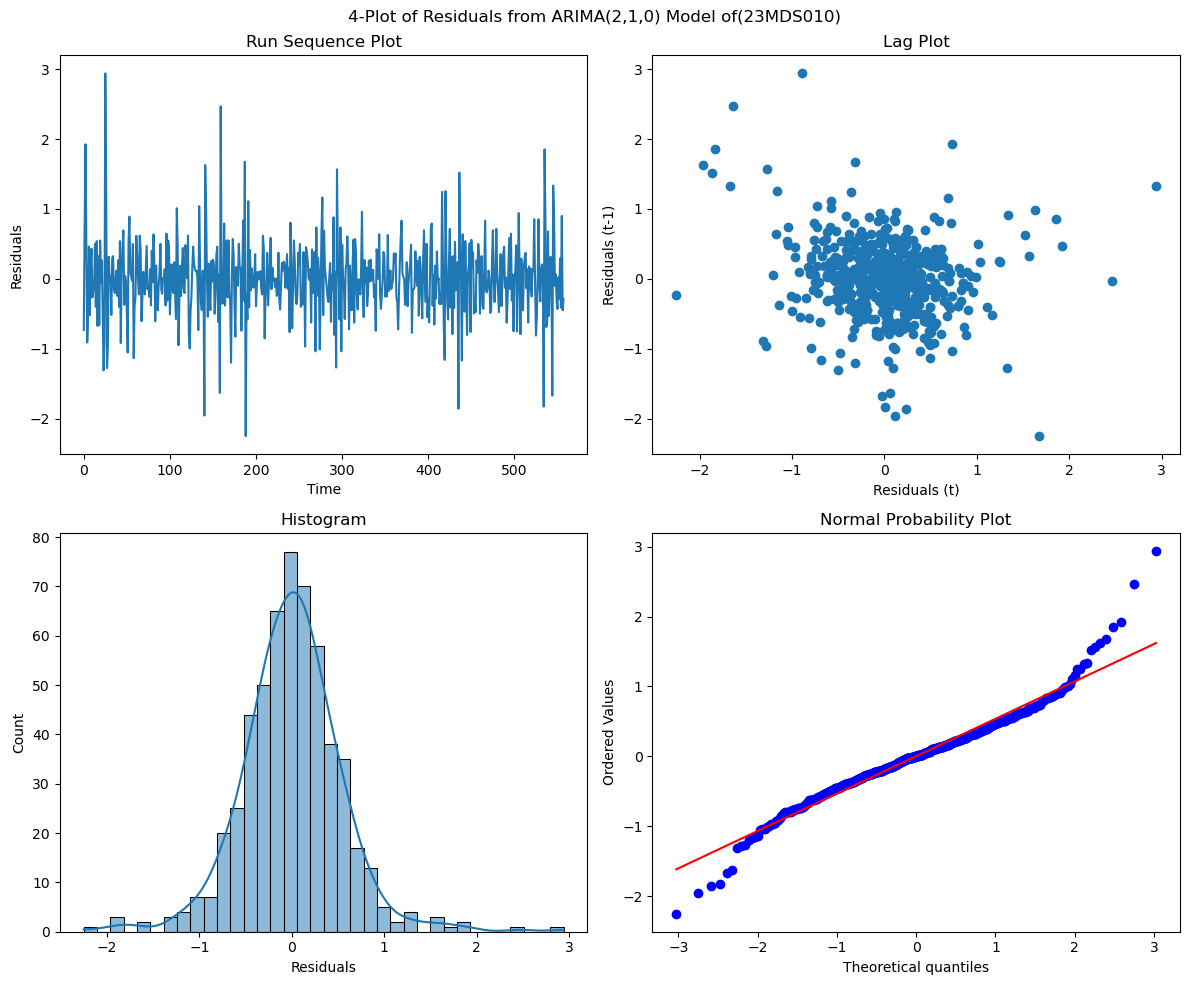

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('4-Plot of Residuals from ARIMA(2,1,0) Model of(23MDS010)')

axs[0, 0].plot(residuals)
axs[0, 0].set_title('Run Sequence Plot')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')

pd.plotting.lag_plot(residuals, lag=1, ax=axs[0, 1])
axs[0, 1].set_title('Lag Plot')
axs[0, 1].set_xlabel('Residuals (t)')
axs[0, 1].set_ylabel('Residuals (t-1)')

sns.histplot(residuals, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Residuals')

stats.probplot(residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Normal Probability Plot')

plt.tight_layout()
plt.show()

In [39]:
# Writing the AR(2) equation using the extracted variables
equation = f"Y_t = {intercept:.4f} + {ar1:.4f} * Y_{{t-1}} + {ar2:.4f} * Y_{{t-2}} + ε_t"
print(equation)

Y_t = -0.0067 + -0.4068 * Y_{t-1} + -0.1647 * Y_{t-2} + ε_t


We can make the following conclusions based on the above 4-plot.
1. The run sequence plot shows that the residuals do not violate the assumption of constant location and scale. It also shows that most of the residuals are in the range (-1, 1).
2. The lag plot indicates that the residuals are not autocorrelated at lag 1.
3. The histogram and normal probability plot indicate that the normal distribution provides an adequate fit for this model.

Autocorrelation Plot of Residuals from ARIMA(2,1,0) Model

<Figure size 1000x600 with 0 Axes>

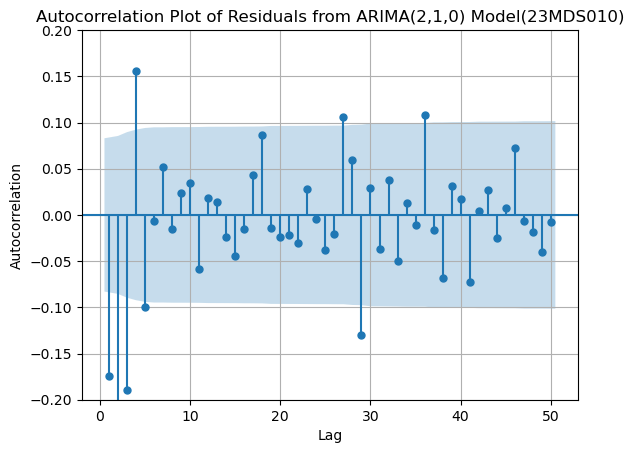

In [45]:
# Plot the autocorrelation of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50,zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(2,1,0) Model(23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-0.2, 0.2)
plt.grid(True)
plt.show()

The autocorrelation plot shows that for the first 25 lags, all sample autocorrelations except those at lags  1,2,3,4 and 28 fall inside the 95 % confidence bounds indicating the residuals appear to be random.

4-Plot of Residuals from ARIMA(0,1,1) Model

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


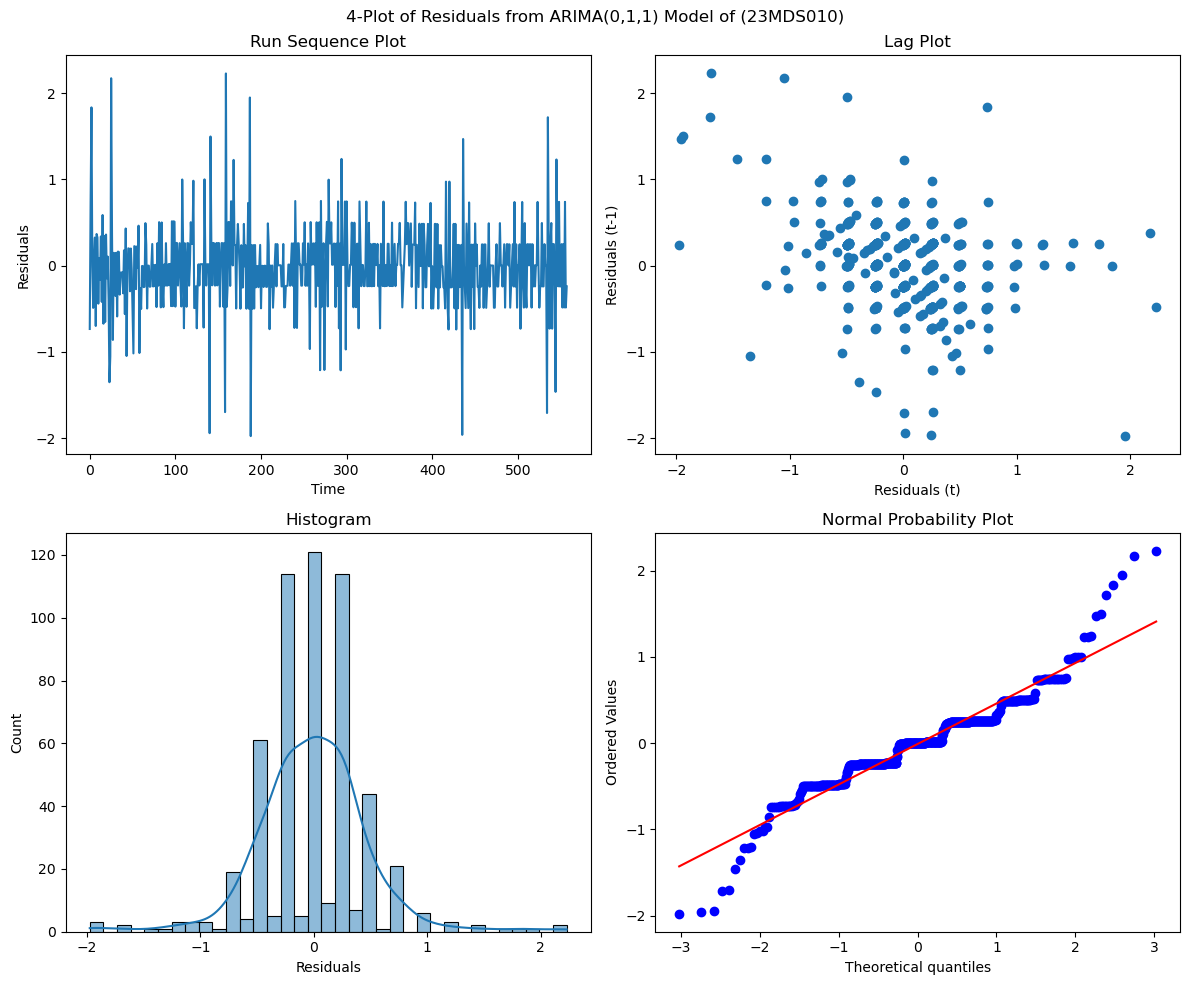

In [41]:
model_011 = ARIMA(df1['data'], order=(0, 1, 1))
results_011 = model_011.fit()
residuals_011 = results_011.resid

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('4-Plot of Residuals from ARIMA(0,1,1) Model of (23MDS010)')

axs[0, 0].plot(residuals_011)
axs[0, 0].set_title('Run Sequence Plot')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')

pd.plotting.lag_plot(residuals_011, lag=1, ax=axs[0, 1])
axs[0, 1].set_title('Lag Plot')
axs[0, 1].set_xlabel('Residuals (t)')
axs[0, 1].set_ylabel('Residuals (t-1)')

sns.histplot(residuals_011, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Residuals')

stats.probplot(residuals_011, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Normal Probability Plot')

plt.tight_layout()
plt.show()

We can make the following conclusions based on the above 4-plot.
1. The run sequence plot shows that the residuals do not violate the assumption of constant location and scale. It also shows that most of the residuals are in the range (-1, 1).
2. The lag plot indicates that the residuals are not autocorrelated at lag 1.
3. The histogram and normal probability plot indicate that the normal distribution provides an adequate fit for this model.

Autocorrelation Plot of Residuals from ARIMA(0,1,1) Model

<Figure size 1000x600 with 0 Axes>

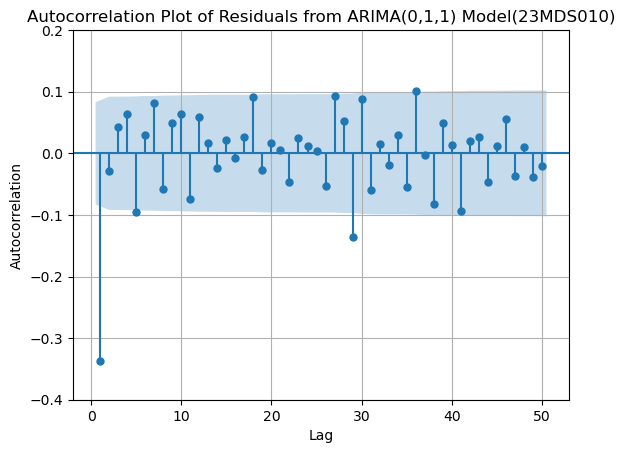

In [43]:
# Plot the autocorrelation of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals_011, lags=50,zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(0,1,1) Model(23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-0.4, 0.2)
plt.grid(True)
plt.show()

Similar to the result for the ARIMA(2,1,0) model, it shows that for the first 50 lags, all sample autocorrelations expect those at lags 1 and 29 fall outside the 95% confidence bounds indicating the residuals appear to be random.

## Moving average

In [49]:
model = AutoReg(df1, lags=1).fit()
print(model.summary())
intercept = model.params[0]
ma1 = model.params[1]
se_intercept = model.bse[0]
se_ma1 = model.bse[1]
ci_ma1 = model.conf_int().iloc[1]
output_data = [
    ["Intercept", f"{intercept:.4f}", f"{se_intercept:.4f}", ""],
    ["MA1", f"{ma1:.4f}", f"{se_ma1:.4f}", f"({ci_ma1[0]:.4f}, {ci_ma1[1]:.4f})"],
    ["Number of Observations:", len(df1['data']), "", ""],
    ["Degrees of Freedom:", len(df1['data']) - 2, "", ""],
    ["Residual Standard Deviation:", model.scale, "", ""]
]

table_headers = ["Source", "Estimate", "Standard Error", "95% Confidence Interval"]
print(tabulate(output_data, headers=table_headers, tablefmt="pipe"))

                            AutoReg Model Results                             
Dep. Variable:                   data   No. Observations:                  558
Model:                     AutoReg(1)   Log Likelihood                -342.864
Method:               Conditional MLE   S.D. of innovations              0.448
Date:                Thu, 25 Apr 2024   AIC                            691.728
Time:                        11:04:54   BIC                            704.695
Sample:                             1   HQIC                           696.792
                                  558                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.019     -0.328      0.743      -0.043       0.031
data.L1       -0.3477      0.040     -8.771      0.000      -0.425      -0.270
                                    Roots           

C:\Users\raval\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


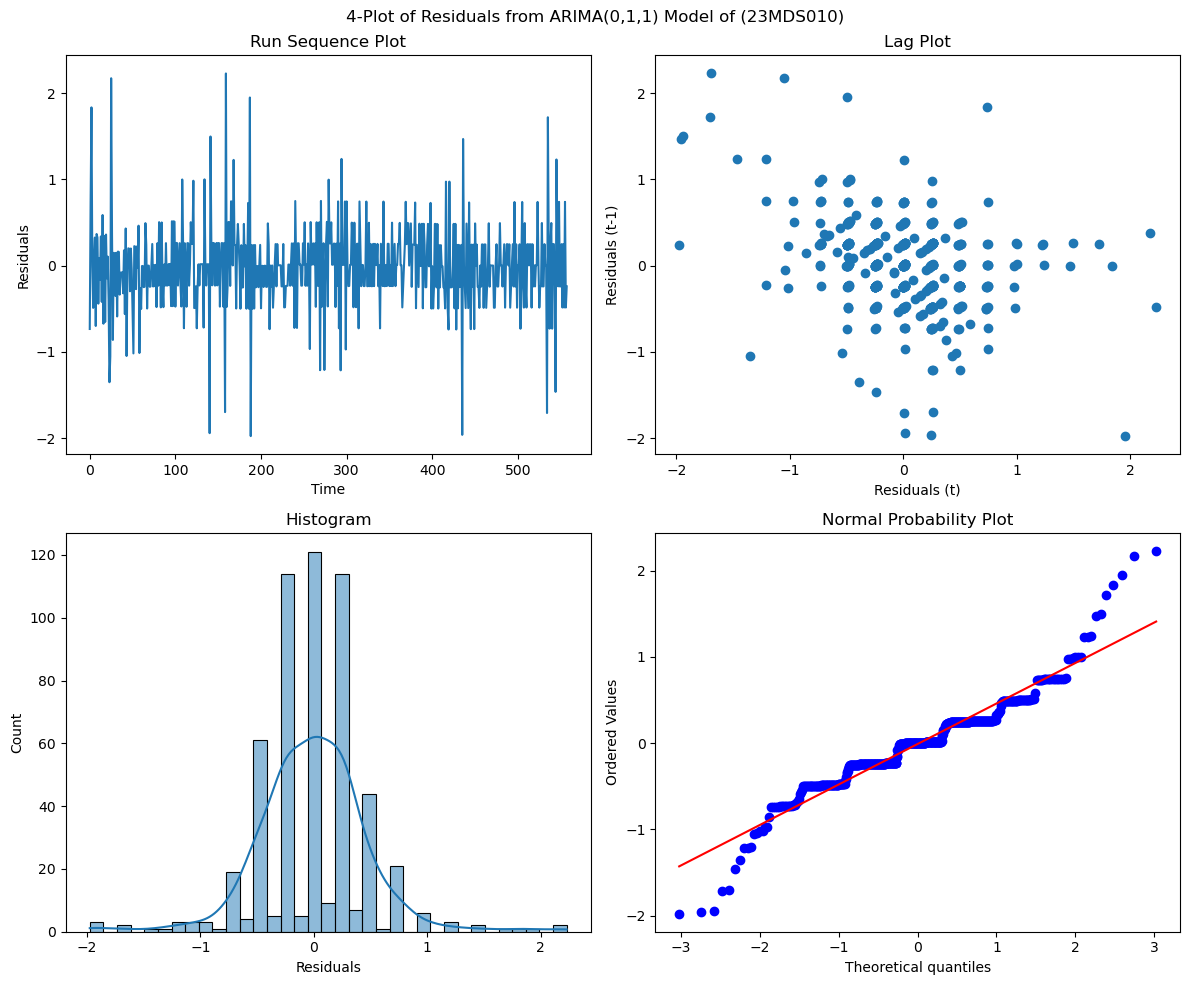

In [51]:
model = ARIMA(df1['data'], order=(0, 1, 1))
results = model.fit()
residuals = results.resid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('4-Plot of Residuals from ARIMA(0,1,1) Model of (23MDS010)')

axs[0, 0].plot(residuals)
axs[0, 0].set_title('Run Sequence Plot')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Residuals')

pd.plotting.lag_plot(residuals, lag=1, ax=axs[0, 1])
axs[0, 1].set_title('Lag Plot')
axs[0, 1].set_xlabel('Residuals (t)')
axs[0, 1].set_ylabel('Residuals (t-1)')

sns.histplot(residuals, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Residuals')

stats.probplot(residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Normal Probability Plot')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

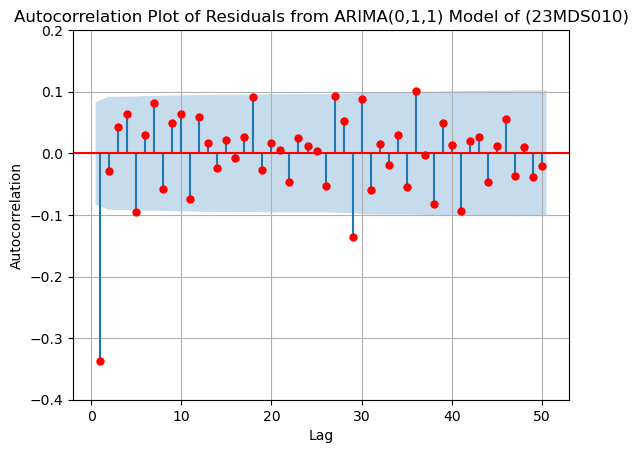

In [52]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50,color="red", zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(0,1,1) Model of (23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)
plt.show()

<Figure size 1000x600 with 0 Axes>

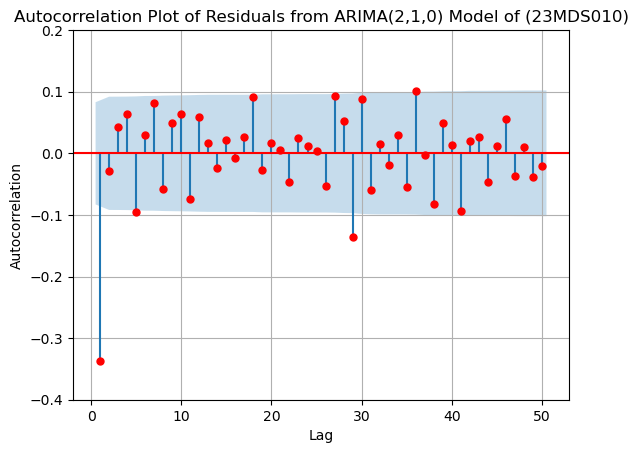

In [53]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50,color="red", zero=False)
plt.title('Autocorrelation Plot of Residuals from ARIMA(2,1,0) Model of (23MDS010)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.4, 0.2)
plt.show()

ARIMA (2,1,0) perfomes batter than ARIMA(0,1,1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Create a sample time series data
np.random.seed(0)
time_series = pd.Series(np.random.randn(100), index=pd.date_range('2022-01-01', periods=100))

# First-order exponential smoothing (Single Exponential Smoothing)
model_first_order = SimpleExpSmoothing(time_series)
result_first_order = model_first_order.fit(smoothing_level=0.2)  # Adjust smoothing level as needed
forecast_first_order = result_first_order.forecast(10)  # Forecast next 10 periods

# Second-order exponential smoothing (Double Exponential Smoothing)
model_second_order = ExponentialSmoothing(time_series, trend='add')
result_second_order = model_second_order.fit(smoothing_level=0.2, smoothing_slope=0.1)  # Adjust smoothing levels as needed
forecast_second_order = result_second_order.forecast(10)  # Forecast next 10 periods

# Plotting
plt.figure(figsize=(12, 6))

# First-order exponential smoothing plot
plt.subplot(1, 2, 1)
plt.plot(time_series, label='Actual')
plt.plot(result_first_order.fittedvalues, label='Fitted (First-order)')
plt.plot(forecast_first_order, label='Forecast (First-order)')
plt.title('First-Order Exponential Smoothing')
plt.legend()

# Second-order exponential smoothing plot
plt.subplot(1, 2, 2)
plt.plot(time_series, label='Actual')
plt.plot(result_second_order.fittedvalues, label='Fitted (Second-order)')
plt.plot(forecast_second_order, label='Forecast (Second-order)')
plt.title('Second-Order Exponential Smoothing')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def smooth(y, alpha=0.2):
    smoothed_y = np.zeros_like(y)
    smoothed_y[0] = y[0]

    for i in range(1, len(y)):
        smoothed_y[i] = alpha * y[i] + (1 - alpha) * smoothed_y[i - 1]

    return smoothed_y

def smoothsecond(y, alpha=0.2, lambda_=0.3):
    smoothed_y = np.zeros_like(y)
    smoothed_y[0] = y[0]

    for i in range(1, len(y)):
        smoothed_y[i] = alpha * y[i] + (1 - alpha) * smoothed_y[i - 1] - lambda_ * (smoothed_y[i - 1] - smoothed_y[i - 2])

    return smoothed_second_y